<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Compara%C3%A7%C3%A3o_ETFs%20v1.04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
! pip install investpy 

In [22]:
import investpy as inv
import pandas as pd 
import seaborn as sns 
import time
import matplotlib.pyplot as plt 
import datetime as dt

In [23]:
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')
print(hoje)

pais = 'united states'

tipo_etf = 'bond'

28/04/2022


In [24]:
# obtendo a lista de todos os ETFs dos Estados Unidos no Investing.com

lista_etf = inv.get_etfs_dict(pais)


In [25]:
# Para buscar informações especificas de cada ETF 
'''
for i in range(len(lista_etf)):
    if (lista_etf[i]['isin']=='US46434V6130'):
        info = lista_etf[i]['name']
'''

#Obetndo lista com o nome de todos os ETFs
nome_etf = []

#Cria um filtro por tipo de etf
for i in range(len(lista_etf)):
  if (lista_etf[i]['asset_class']== tipo_etf):
    nome_etf.append(lista_etf[i]['name'])  


# #para fazer a busca sem filtro
# for i in range(len(lista_etf)):
#   nome_etf.append(lista_etf[i]['name'])


In [26]:
# nome_etf_filtro  = []
# filtro = [s for s in nome_etf if "High Yield" in s]

# for i in range(len(nome_etf)):
#   if(nome_etf[i] == any(filtro)):
#     nome_etf.drop(nome_etf[i])

In [27]:
# painel = pd.DataFrame()

# painel['IGOV'] = inv.get_etf_historical_data(etf = 'iShares International Treasury Bond',country = pais, from_date = '01/01/2015',to_date = hoje)['Close']

# painel['BWX'] = inv.get_etf_historical_data(etf = 'SPDR Barclays International Treasury Bond',country = pais, from_date = '01/01/2015',to_date = hoje)['Close']

In [28]:
etf1 =pd.DataFrame()
painel = pd.DataFrame()

for i  in range(len(nome_etf)):
  try:
    etf1= inv.get_etf_historical_data(etf = nome_etf[i], country = pais, from_date = '01/01/2015', to_date = hoje)['Close']
    etf1 = pd.DataFrame(etf1)
    etf1.columns = [nome_etf[i]]
    painel = pd.concat([painel,etf1[nome_etf[i]]],axis =1)
    time.sleep(1)
  except:
    pass
      

/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "united kingdom" and default stock_exchange: "London".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Xetra".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "mexico" and default stock_exchange: "Mexico".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Munich".
  Warning,


In [29]:
painel = painel.set_index(pd.to_datetime(painel.index))


In [30]:
painel.head()


,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,iShares Inflation Hedged Corporate Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
2015-01-02,41.34,49.12,NaN,25.53,NaN,24.90,NaN,24.08,NaN,NaN,...,49.29,41.34,21.32,NaN,NaN,NaN,71.39,NaN,NaN,NaN
2015-01-05,40.86,49.14,NaN,25.64,NaN,24.87,NaN,23.86,NaN,NaN,...,49.27,40.92,21.12,NaN,44.78,NaN,70.99,NaN,NaN,NaN
2015-01-06,40.20,49.16,NaN,25.53,NaN,24.70,NaN,23.71,NaN,NaN,...,49.02,40.90,21.12,NaN,44.33,NaN,70.23,NaN,NaN,NaN
2015-01-07,40.38,49.18,NaN,25.66,NaN,24.83,NaN,23.93,NaN,NaN,...,49.10,41.24,NaN,NaN,44.49,NaN,70.78,NaN,NaN,NaN
2015-01-08,40.63,49.27,NaN,25.69,NaN,24.87,NaN,24.30,NaN,NaN,...,49.18,41.46,21.39,NaN,44.94,NaN,71.33,NaN,NaN,NaN


In [31]:
import io
import requests

url= 'https://github.com/Edu-Moreira/Estudos-de-Python/raw/main/Dados/Dados%20IE.xlsx'
myfile = requests.get(url)

df=pd.read_excel(myfile.content)
print(df)

           Data  USD LC07TRUU   USD SPTR   USD M1CXBRU   USD MIMUEMRN   \
0    1998-12-31       212.0865   1670.006        477.68      267.04001   
1    1999-01-04       212.0641   1668.521        486.52      270.20279   
2    1999-01-05       211.8054   1691.253        489.26      272.39230   
3    1999-01-06       212.1331   1729.083        496.11      278.48300   
4    1999-01-07       211.7084   1725.640        494.54      279.80511   
...         ...            ...        ...           ...            ...   
5790 2022-01-18       616.7014   9595.926       1588.46     1758.11600   
5791 2022-01-19       618.1821   9503.135       1580.24     1755.67800   
5792 2022-01-20       618.8629   9398.964       1590.57     1776.91891   
5793 2022-01-21       620.5297   9221.282       1564.14     1759.46330   
5794 2022-01-24       619.7807   9246.837       1521.55     1727.05400   

      USD LG38TRUU  USD SPTRSMCP   
0         244.2719        186.094  
1         244.2719        186.094  
2  

In [32]:
df.rename(columns= {'Data': 'Date'}, inplace = True)
df_benchmark  = df[['Date','USD LG38TRUU']]
df_benchmark = df_benchmark.set_index('Date')
df_benchmark = df_benchmark['20150102':]
df_benchmark

,USD LG38TRUU
Date,
2015-01-02,444.7735
2015-01-05,443.2462
2015-01-06,445.2654
2015-01-07,441.3983
2015-01-08,441.2247
...,...
2022-01-18,491.6966
2022-01-19,491.8776
2022-01-20,493.2359


In [33]:
painel1 = painel.loc['20150102':'20220121']
painel1

,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,iShares Inflation Hedged Corporate Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
2015-01-02,41.34,49.12,NaN,25.53,NaN,24.90,NaN,24.08,NaN,NaN,...,49.29,41.34,21.32,NaN,NaN,NaN,71.39,NaN,NaN,NaN
2015-01-05,40.86,49.14,NaN,25.64,NaN,24.87,NaN,23.86,NaN,NaN,...,49.27,40.92,21.12,NaN,44.78,NaN,70.99,NaN,NaN,NaN
2015-01-06,40.20,49.16,NaN,25.53,NaN,24.70,NaN,23.71,NaN,NaN,...,49.02,40.90,21.12,NaN,44.33,NaN,70.23,NaN,NaN,NaN
2015-01-07,40.38,49.18,NaN,25.66,NaN,24.83,NaN,23.93,NaN,NaN,...,49.10,41.24,NaN,NaN,44.49,NaN,70.78,NaN,NaN,NaN
2015-01-08,40.63,49.27,NaN,25.69,NaN,24.87,NaN,24.30,NaN,NaN,...,49.18,41.46,21.39,NaN,44.94,NaN,71.33,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14,30.88,48.21,98.38,NaN,9.465,24.47,51.24,15.11,27.68,29.50,...,46.69,29.91,NaN,51.98,NaN,NaN,72.72,50.09,47.22,47.24
2022-01-18,30.74,48.10,98.39,NaN,9.450,24.47,50.98,14.99,27.59,29.24,...,46.60,29.69,NaN,51.63,NaN,NaN,72.31,49.87,46.90,47.11
2022-01-19,30.81,48.12,98.32,NaN,9.520,24.42,51.01,15.00,27.63,29.24,...,46.57,29.97,NaN,51.62,NaN,NaN,72.47,49.86,46.89,47.10
2022-01-20,31.00,48.12,98.32,NaN,9.500,24.32,50.97,14.93,27.60,29.22,...,46.55,30.00,NaN,51.43,NaN,NaN,72.58,49.75,46.75,47.00


In [113]:
tot_df = pd.concat([df_benchmark,painel1], axis=1)
tot_df.tail(20)

,USD LG38TRUU,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
2021-12-28,494.6891,31.81,48.35,98.37,NaN,9.570,24.64,51.87,14.73,27.88,...,46.70,30.09,NaN,52.55,NaN,NaN,74.09,50.65,47.73,47.48
2021-12-29,494.6156,31.63,48.34,98.39,NaN,9.550,24.62,51.79,14.65,27.88,...,46.73,29.96,NaN,52.46,NaN,NaN,73.97,50.58,47.65,47.44
2021-12-30,493.9941,31.67,48.34,98.39,NaN,9.560,24.65,51.86,14.68,27.86,...,46.67,29.98,NaN,52.44,NaN,NaN,74.17,50.56,47.60,47.42
2021-12-31,495.3898,31.57,48.34,98.40,NaN,9.570,24.65,51.82,14.78,27.86,...,46.68,29.97,NaN,52.47,NaN,NaN,74.00,50.57,47.63,47.44
2022-01-03,492.4353,31.48,48.30,98.40,NaN,9.500,24.58,51.65,14.90,27.86,...,46.77,29.91,NaN,52.42,NaN,NaN,73.85,50.53,47.62,47.41
2022-01-04,491.8341,31.51,48.31,98.40,NaN,9.550,24.55,51.67,14.95,27.84,...,46.72,29.71,NaN,52.30,NaN,NaN,73.88,50.45,47.59,47.37
2022-01-05,492.5479,31.10,48.21,98.41,NaN,9.530,24.50,51.49,14.84,27.82,...,46.76,29.64,NaN,52.01,NaN,NaN,73.47,50.14,47.16,47.19
2022-01-06,489.9310,31.07,48.21,98.40,NaN,9.530,24.50,51.44,14.89,27.79,...,46.79,29.68,NaN,51.91,NaN,NaN,73.40,50.09,47.09,47.16
2022-01-07,490.8460,31.14,48.22,98.39,NaN,9.510,24.45,51.34,14.97,27.76,...,46.71,29.79,NaN,51.78,NaN,NaN,73.55,50.01,47.01,47.14
2022-01-10,490.7327,30.96,48.17,98.39,NaN,9.510,24.41,51.28,14.93,27.73,...,46.66,29.75,NaN,51.74,NaN,NaN,73.26,49.99,47.01,47.17


In [137]:
return_etfs = tot_df.fillna(method='bfill')
return_etfs = tot_df.loc['20180410':]
# return_etfs  =return_etfs/return_etfs.iloc[0]

In [138]:
return_etfs.tail(20)

,USD LG38TRUU,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
2021-12-28,494.6891,31.81,48.35,98.37,NaN,9.570,24.64,51.87,14.73,27.88,...,46.70,30.09,NaN,52.55,NaN,NaN,74.09,50.65,47.73,47.48
2021-12-29,494.6156,31.63,48.34,98.39,NaN,9.550,24.62,51.79,14.65,27.88,...,46.73,29.96,NaN,52.46,NaN,NaN,73.97,50.58,47.65,47.44
2021-12-30,493.9941,31.67,48.34,98.39,NaN,9.560,24.65,51.86,14.68,27.86,...,46.67,29.98,NaN,52.44,NaN,NaN,74.17,50.56,47.60,47.42
2021-12-31,495.3898,31.57,48.34,98.40,NaN,9.570,24.65,51.82,14.78,27.86,...,46.68,29.97,NaN,52.47,NaN,NaN,74.00,50.57,47.63,47.44
2022-01-03,492.4353,31.48,48.30,98.40,NaN,9.500,24.58,51.65,14.90,27.86,...,46.77,29.91,NaN,52.42,NaN,NaN,73.85,50.53,47.62,47.41
2022-01-04,491.8341,31.51,48.31,98.40,NaN,9.550,24.55,51.67,14.95,27.84,...,46.72,29.71,NaN,52.30,NaN,NaN,73.88,50.45,47.59,47.37
2022-01-05,492.5479,31.10,48.21,98.41,NaN,9.530,24.50,51.49,14.84,27.82,...,46.76,29.64,NaN,52.01,NaN,NaN,73.47,50.14,47.16,47.19
2022-01-06,489.9310,31.07,48.21,98.40,NaN,9.530,24.50,51.44,14.89,27.79,...,46.79,29.68,NaN,51.91,NaN,NaN,73.40,50.09,47.09,47.16
2022-01-07,490.8460,31.14,48.22,98.39,NaN,9.510,24.45,51.34,14.97,27.76,...,46.71,29.79,NaN,51.78,NaN,NaN,73.55,50.01,47.01,47.14
2022-01-10,490.7327,30.96,48.17,98.39,NaN,9.510,24.41,51.28,14.93,27.73,...,46.66,29.75,NaN,51.74,NaN,NaN,73.26,49.99,47.01,47.17


In [139]:
corr_etfs = return_etfs
corr_etfs = corr_etfs.corr()
gla_etfs = corr_etfs['USD LG38TRUU']

etfs_eleitos = gla_etfs.sort_values(ascending = False)

In [140]:
etfs_eleitos.head(15)

USD LG38TRUU                                          1.000000
iShares International Treasury Bond                   0.975539
SPDR Barclays International Treasury Bond             0.939627
USAA Core Short-Term Bond                             0.939586
PowerShares International Corporate Bond              0.938491
Fidelity Limited Term Bond                            0.933044
SPDR Barclays Intermediate Term Corporate Bond        0.922763
FlexShares iBoxx 5-Year Target Duration TIPS          0.919947
Columbia Diversified Fixed Income Allocation          0.919617
PIMCO Short Term Municipal Bond Active Exchange-Tr    0.919571
iShares iBonds Dec 2027 Term Corporate                0.914780
Guggenheim Total Return Bond                          0.913985
VanEck Vectors Green Bond                             0.911865
iShares Intermediate Credit Bond                      0.911558
Guggenheim BulletShares 2027 Corporate Bond           0.911386
Name: USD LG38TRUU, dtype: float64

In [141]:
a = list(etfs_eleitos.head(10).index)
# a.append('Date')
b = tot_df[a]
# b = b.set_index('Date')

In [145]:
b = b.loc['20180410':]
c = b /b.iloc[0]


In [149]:
c.corr()

,USD LG38TRUU,iShares International Treasury Bond,SPDR Barclays International Treasury Bond,USAA Core Short-Term Bond,PowerShares International Corporate Bond,Fidelity Limited Term Bond,SPDR Barclays Intermediate Term Corporate Bond,FlexShares iBoxx 5-Year Target Duration TIPS,Columbia Diversified Fixed Income Allocation,PIMCO Short Term Municipal Bond Active Exchange-Tr
USD LG38TRUU,1.000000,0.976062,0.941843,0.941854,0.938434,0.932023,0.922123,0.922136,0.918144,0.920420
iShares International Treasury Bond,0.976062,1.000000,0.984149,0.888018,0.914639,0.892388,0.878094,0.840596,0.877669,0.861249
SPDR Barclays International Treasury Bond,0.941843,0.984149,1.000000,0.849291,0.888010,0.862320,0.848895,0.763836,0.861070,0.823672
USAA Core Short-Term Bond,0.941854,0.888018,0.849291,1.000000,0.881222,0.982231,0.976420,0.942385,0.967091,0.976652
PowerShares International Corporate Bond,0.938434,0.914639,0.888010,0.881222,1.000000,0.850843,0.837575,0.849817,0.833514,0.859226
Fidelity Limited Term Bond,0.932023,0.892388,0.862320,0.982231,0.850843,1.000000,0.993543,0.933210,0.980843,0.970904
SPDR Barclays Intermediate Term Corporate Bond,0.922123,0.878094,0.848895,0.976420,0.837575,0.993543,1.000000,0.933948,0.990747,0.975760
FlexShares iBoxx 5-Year Target Duration TIPS,0.922136,0.840596,0.763836,0.942385,0.849817,0.933210,0.933948,1.000000,0.906200,0.940734
Columbia Diversified Fixed Income Allocation,0.918144,0.877669,0.861070,0.967091,0.833514,0.980843,0.990747,0.906200,1.000000,0.970844
PIMCO Short Term Municipal Bond Active Exchange-Tr,0.920420,0.861249,0.823672,0.976652,0.859226,0.970904,0.975760,0.940734,0.970844,1.000000


In [146]:
c=  c.fillna(method = 'bfill')

In [147]:
import plotly.express as px

fig = px.line(
    c,
    height = 800,
    width = 1200,
    template = 'plotly_dark',
    title = 'ETFS Disponíveis vs USD LG38TRUU',
    labels = {'value' : 'Retorno Escalar', 'index': 'Data' }

)

fig

## <font color = '009dcf'> Cáculo de Tracking Error
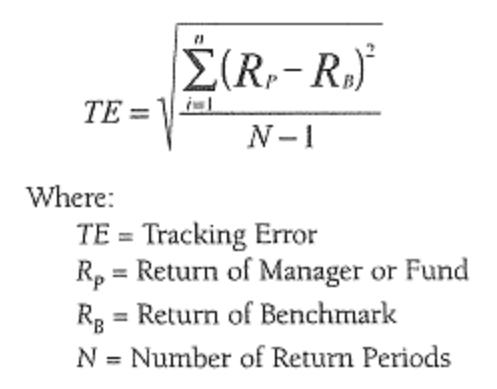

In [ ]:
d = b.pct_change()
d = d[1:]
d.iloc[:,1:]



In [ ]:
for i in (range(len(d.columns))):
  print (i)

In [ ]:
TE = TE.dropna()
sum(TE)

In [ ]:
import numpy as np

TE = pd.DataFrame()

for i  in range(len(d.columns)):
  TE[i] = ((np.subtract(d['USD LG38TRUU'],d.iloc[:,i]))**2)
  TE[i] = TE.iloc[:,i].dropna()
  # TE[i] = np.sqrt(sum(TE))
  
TE